<a href="https://colab.research.google.com/github/soph002/pearlHacks/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SSE 1.5794101362900725
0.7778880665771849
0.65270670596199
SSE 26.808504013127827
a0 0.23864454934776508
a1 -0.02403279306718296
SSE 6.4641
a0 0.2585038609023677
a1 0.6350160744932017
SSE 6.46409999999999
a0 0.25608186090236773
a1 0.5551278744932018
SSE 6.464099999998541
a0 0.25365986090236775
a1 0.47523967449320176
SSE 6.46409999977406
a0 0.2512378609023677
a1 0.39535147449320035
SSE 6.46409996335432
a0 0.2488158609023619
a1 0.31546327449302625
SSE 6.4640937752957575
a0 0.24639386090167184
a1 0.23557507447253584
SSE 6.462994768544678
a0 0.24397186082649616
a1 0.15568687230703498
SSE 6.262153372621848
a0 0.24154985467389187
a1 0.07579851626691873
SSE 4.858061116881663
a0 0.23912815799919457
a1 -0.004071821959685584
SSE 6.4641
a0 0.4352052790985035
a1 6.5630280597943385
SSE 6.4641
a0 0.4327832790985035
a1 6.483139859794338
SSE 6.4641
a0 0.4303612790985035
a1 6.403251659794338
SSE 6.4641
a0 0.42793927909850354
a1 6.323363459794338
SSE 6.4641
a0 0.42551727909850356
a1 6.243475259794338
SS

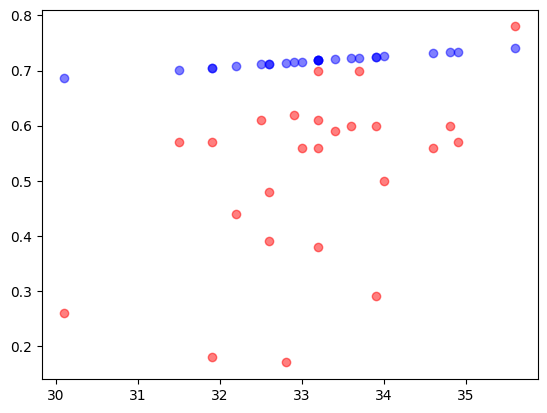

In [ ]:
import pip
import pandas as pd
import numpy as np
from numpy import linalg
import math
from scipy.linalg import svd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

x=np.array([35.6, 32.5, 34.6, 32.8, 34.9, 33.2, 31.9, 32.2, 31.9, 32.6, 33.9, 33.7, 31.5, 32.6, 34, 33.2, 34.8, 33.9, 32.9, 33.4, 30.1, 33.2, 33.2, 33.6, 33])
y=np.array([0.78, 0.61, 0.56, 0.17, 0.57, 0.56, 0.57, 0.44, 0.18, 0.48, 0.29, 0.7, 0.57, 0.39, 0.5, 0.7, 0.6, 0.6, 0.62, 0.59, 0.26, 0.38, 0.61, 0.6, 0.56])
#Guesses
a0=0.24
a1=0.12

fhat=poly.Polynomial([a0,a1])
yhat=1/(1+np.exp(-fhat(x)))
#yhat=1/1+e^-(.24+.12x)
SSE=np.sum((y-yhat)**2)
print("SSE", SSE)

plt.scatter(x,y,alpha=0.5,color="red")
plt.title("Average Defensive Rebounds vs. Winning Proportions 2023-2024 NBA Season")
plt.xlabel("Average Defensive Rebounds")
plt.ylabel("Winning Proportions")
plt.scatter(x,yhat,alpha=0.5,color="blue")

yhat=1/(1+np.exp(-(.24+.12*40)))
print(yhat)
#99% chance of winning if the average defensive rebounds was 40

yhat=1/(1+np.exp(-(.24+.12*25)))
print(yhat)

#96% chance of winning if the average defensive rebounds was 25



#More Accurate
#Lerning rate guess
r=.0004
for i in range(0,20):
  grad_phi=np.exp(-fhat(x))/((1+np.exp(-fhat(x)))**2)
  grad_a0=np.sum(-2*grad_phi*(y-yhat))
  grad_a1=np.sum(-2*grad_phi*x*(y-yhat))
  a0=a0-r*grad_a0
  a1=a1-r*grad_a1
  fhat=poly.Polynomial([a0,a1])
  yhat=1/(1+np.exp(-fhat(x)))
  SSE=np.sum((y-yhat)**2)
  print("SSE", SSE)
  print("a0", a0)
  print("a1", a1)
#a0=.24
#a1=-0.005

x=np.array([35.6, 32.5, 34.6, 32.8, 34.9, 33.2, 31.9, 32.2, 31.9, 32.6, 33.9, 33.7, 31.5, 32.6, 34, 33.2, 34.8, 33.9, 32.9, 33.4, 30.1, 33.2, 33.2, 33.6, 33])
y=np.array([0.78, 0.61, 0.56, 0.17, 0.57, 0.56, 0.57, 0.44, 0.18, 0.48, 0.29, 0.7, 0.57, 0.39, 0.5, 0.7, 0.6, 0.6, 0.62, 0.59, 0.26, 0.38, 0.61, 0.6, 0.56])

r=.0004
a0=0.24
a1=-0.005
fhat=poly.Polynomial([a0,a1])
yhat=1/(1+np.exp(-fhat(x)))
#yhat=1/1+e^-(.24+-0.005x)


plt.scatter(x,yhat,alpha=0.5,color="blue")
plt.title("Gradient Descent of Logistic Sigmoid Activation Function")
plt.xlabel("Average Defensive Rebounds")
plt.ylabel("Probablity of NBA Teams Winning")


yhat=1/(1+np.exp(-(.24+-.005*40)))
print(yhat)
#51% chance of winning if the average defensive rebounds was 40

yhat=1/(1+np.exp(-(.24+-.005*27)))
print(yhat)

#53% chance of winning if the average defensive rebounds was 27


#Tangent
x=np.array([35.6, 32.5, 34.6, 32.8, 34.9, 33.2, 31.9, 32.2, 31.9, 32.6, 33.9, 33.7, 31.5, 32.6, 34, 33.2, 34.8, 33.9, 32.9, 33.4, 30.1, 33.2, 33.2, 33.6, 33])
y=np.array([0.78, 0.61, 0.56, 0.17, 0.57, 0.56, 0.57, 0.44, 0.18, 0.48, 0.29, 0.7, 0.57, 0.39, 0.5, 0.7, 0.6, 0.6, 0.62, 0.59, 0.26, 0.38, 0.61, 0.6, 0.56])
#Guesses
a0=0.24
a1=0.02
fhat=poly.Polynomial([a0,a1])
yhat=np.tanh(fhat(x))
SSE=np.sum((y-yhat)**2)
print("SSE", SSE)
#yhat=tan(.1+.9x)

plt.scatter(x,y,alpha=0.5,color="red")
plt.scatter(x,yhat,alpha=0.5,color="blue")


yhat=np.tanh(.24+.02*40)
print(yhat)

#If a team were to have an average of 40 rebounds, they would have a 36% chance of winning

yhat=np.tanh(.24+.02*27)
print(yhat)

#If a team were to have an average of 27 defensive rebounds, they would have a 31% chance of winning


r=0.0001
for i in range(0,20):
  grad_phi=1/(np.cosh(fhat(x)))**2
  grad_a0=np.sum(-2*grad_phi*(y-yhat))
  grad_a1=np.sum(-2*grad_phi*x*(y-yhat))
  a0=a0-r*grad_a0
  a1=a1-r*grad_a1
  fhat=poly.Polynomial([a0,a1])
  yhat=np.tanh(fhat(x))
  SSE=np.sum((y-yhat)**2)
  print("SSE", SSE)
  print("a0", a0)
  print("a1", a1)

x=np.array([35.6, 32.5, 34.6, 32.8, 34.9, 33.2, 31.9, 32.2, 31.9, 32.6, 33.9, 33.7, 31.5, 32.6, 34, 33.2, 34.8, 33.9, 32.9, 33.4, 30.1, 33.2, 33.2, 33.6, 33])
y=np.array([0.78, 0.61, 0.56, 0.17, 0.57, 0.56, 0.57, 0.44, 0.18, 0.48, 0.29, 0.7, 0.57, 0.39, 0.5, 0.7, 0.6, 0.6, 0.62, 0.59, 0.26, 0.38, 0.61, 0.6, 0.56])

a0=0.24
a1=0.009
r=0.0001
fhat=poly.Polynomial([a0,a1])
yhat=np.tanh(fhat(x))
#yhat=tan(.24+0.009x)


plt.scatter(x,yhat,alpha=0.5,color="blue")
plt.title("Gradient Descent of Hyperbolic Tangent Activation Function")
plt.xlabel("Average Defensive Rebounds")
plt.ylabel("Probablity of NBA Teams Winning")
yhat=np.tanh(.24+.009*40)
print(yhat)




#If a team were to have an average of 40 rebounds, they would have a 54% chance of winning

yhat=np.tanh(.24+.009*27)
print(yhat)


#If a team were to have an average of 27 defensive rebounds, they would have a 45% chance of winning

#Hyperbolic Tangent SSE for inititial guess=1.57
#Hyperbolic Tangent SSE for Gradient Decent=0.58
#Logistic Sigmoid SEE for initial guess=6.12
#Logistic Sigmoid SSE for Gradient Decent=0.6

